In [7]:
data_dir = 'C:/Users/lenovo/Downloads/cifar-10-batches-py'
import pickle  # Importation du module pickle
import os
import numpy as np

# Fonction pour charger un lot de données CIFAR-10
def load_cifar10_batch(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='bytes')  # Chargement des données avec pickle
        images = data[b'data']
        labels = data[b'labels']
        images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype("float32")
        labels = np.array(labels)
        return images, labels

# Exemple d'utilisation
filename = 'C:/Users/lenovo/Downloads/cifar-10-batches-py/data_batch_1'
images, labels = load_cifar10_batch(filename)
print(f'Images shape: {images.shape}, Labels shape: {labels.shape}')




Images shape: (10000, 32, 32, 3), Labels shape: (10000,)


### Step-by-Step Explanation of the Code

#### 1. **Data Loading & Preprocessing**
   - **Dataset Path**: The code begins by specifying the path to the CIFAR-10 dataset, which is stored in the folder `'cifar-10-batches-py'`.
   - **Loading Data**: Two functions are defined to load the CIFAR-10 data:
     - `load_cifar10_batch`: This function loads individual data batches. It reads the file, extracts image data and labels, reshapes the images into the correct format (32x32x3), and converts the labels into a NumPy array.
     - `load_cifar10_data`: This function loads all the CIFAR-10 data by iterating over five training batches and one test batch, combining them into training and test datasets.
   - **Normalization**: Once the data is loaded, the pixel values of the images are normalized by dividing by 255.0, which scales the values to the range [0, 1]. This step is crucial for faster convergence during model training.

#### 2. **Model Definition**
   - **Building the CNN**: A Convolutional Neural Network (CNN) is constructed using TensorFlow and Keras. The model consists of:
     - Three convolutional layers (`Conv2D`), each followed by a max-pooling layer (`MaxPooling2D`) to reduce spatial dimensions.
     - Dropout layers are added after the convolutional layers and the dense layer to reduce overfitting by randomly setting a fraction of input units to 0 during training.
     - A flatten layer (`Flatten`) converts the 2D outputs from the convolutional layers into a 1D vector.
     - A dense layer (`Dense`) with 64 units and ReLU activation is used to learn complex features.
     - The output layer has 10 units (one for each class in CIFAR-10), which outputs raw logits.

#### 3. **Model Compilation**
   - **Compile the Model**: The model is compiled with the Adam optimizer, which is an adaptive learning rate optimizer. The loss function used is `SparseCategoricalCrossentropy`, suitable for multi-class classification. The model also tracks accuracy as a metric during training and evaluation.

#### 4. **Training the Model**
   - **Callbacks Setup**: Two callbacks are used:
     - `ModelCheckpoint`: Saves the model with the best validation loss during training. The model is saved with the extension `.keras`.
     - `EarlyStopping`: Stops training early if the validation loss does not improve after three consecutive epochs, preventing overfitting.
   - **Model Training**: The model is trained for 20 epochs on the training data, with validation on the test data. The training history, including accuracy and loss, is stored for later visualization.

#### 5. **Evaluation**
   - **Visualization**: After training, the model's performance is visualized by plotting accuracy and loss over the epochs for both training and validation sets.
   - **Model Loading & Final Evaluation**: The best model saved during training is loaded, and its performance is evaluated on the test set to report final accuracy and loss.


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.2666 - loss: 1.9402 - val_accuracy: 0.4892 - val_loss: 1.3828
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4872 - loss: 1.4280 - val_accuracy: 0.5758 - val_loss: 1.1730
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5544 - loss: 1.2617 - val_accuracy: 0.6173 - val_loss: 1.0748
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5894 - loss: 1.1640 - val_accuracy: 0.6517 - val_loss: 0.9988
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.6237 - loss: 1.0730 - val_accuracy: 0.6536 - val_loss: 0.9751
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6456 - loss: 1.0226 - val_accuracy: 0.6680 - val_loss: 0.9734
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.6605 - loss: 0.9797 - val_accuracy: 0.6994 - val_loss: 0.8717
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6777 -

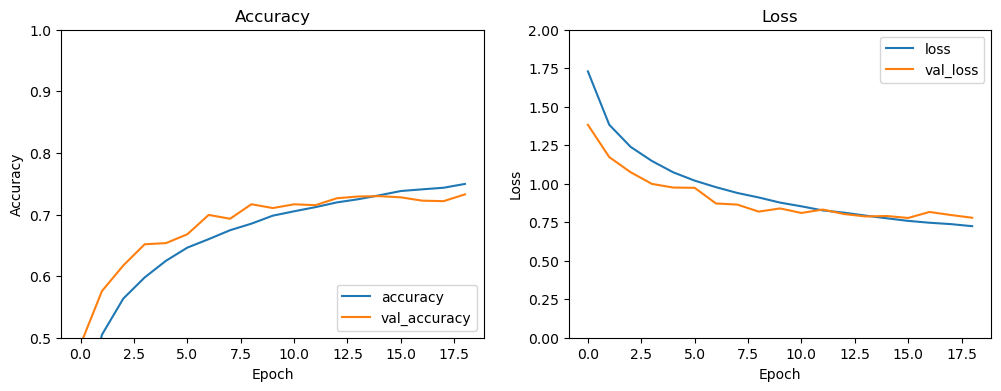

313/313 - 2s - 5ms/step - accuracy: 0.7279 - loss: 0.7777
Test Accuracy: 0.7279000282287598
Test Loss: 0.7776526808738708


In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np

# Section 1: Data Loading & Preprocessing

# Spécifiez le chemin vers votre dossier extrait 'cifar-10-batches-py'
data_dir = 'C:/Users/lenovo/Downloads/cifar-10-batches-py'

# Fonction pour charger un lot de données CIFAR-10
def load_cifar10_batch(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='bytes')
        images = data[b'data']
        labels = data[b'labels']
        images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype("float32")
        labels = np.array(labels)
        return images, labels

# Fonction pour charger toutes les données CIFAR-10
def load_cifar10_data(data_dir):
    train_images = []
    train_labels = []
    for i in range(1, 6):
        filename = os.path.join(data_dir, f'data_batch_{i}')
        images, labels = load_cifar10_batch(filename)
        train_images.append(images)
        train_labels.append(labels)
    train_images = np.concatenate(train_images)
    train_labels = np.concatenate(train_labels)
    
    test_images, test_labels = load_cifar10_batch(os.path.join(data_dir, 'test_batch'))
    
    return (train_images, train_labels), (test_images, test_labels)

# Chargement des données CIFAR-10
(train_images, train_labels), (test_images, test_labels) = load_cifar10_data(data_dir)

# Normalisation des images
train_images, test_images = train_images / 255.0, test_images / 255.0


# Section 2: Model Definition

# Création du modèle de réseau de neurones convolutionnel (CNN)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.25),  # Ajout de Dropout pour régularisation
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Ajout de Dropout pour régularisation
    layers.Dense(10)
])


# Section 3: Model Compilation

# Compilation du modèle
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Section 4: Training

# Callbacks pour sauvegarder le meilleur modèle
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
]

# Entraînement du modèle
history = model.fit(train_images, train_labels, epochs=20,  # Augmentation du nombre d'époques
                    validation_data=(test_images, test_labels),
                    callbacks=callbacks)


# Section 5: Evaluation

# Évaluation du modèle
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()

# Charger le meilleur modèle et évaluation finale
best_model = tf.keras.models.load_model('best_model.keras')
test_loss, test_acc = best_model.evaluate(test_images, test_labels, verbose=2)
print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')
